In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
np.set_printoptions(precision=3)

# INF 554 Lab 1: introduction to the machine learning pipeline

## Introduction

The goal of this lab is to demonstrate the *machine learning pipeline*. We cover a step by step overview of a typical machine learning task, and at each step describe the subtasks that need to be performed. For further information regarding the concepts relevant to this lab, see the lecture slides.

## The Task and Data

Data is available in the ```data``` folder. This data consists of rows of measurements associated with cell growth in Scots pine trees monitored in the commune of Walscheid in France. Each row corresponds to the data of one week. The features (we shall denote by variables $X_1,\ldots,X_3$) are: the week number, the average measured temperature, and soil moisture over that week. The final column (we shall denote $Y$) is the target; the number of new cells (known as \textit{tracheids}) measured during the corresponding week (the number is an average over measurements from several trees). Let $\mathbf{X} \in \mathbf{R}^{n \times 3}$ be the instances ($n$ weeks; i.e., each row $\mathbf{x}_i$ is an instance; corresponding to realizations of $X_1,\ldots,X_3$, associated with label $y_i$); and $\mathbf{y} = [y_1,\ldots,y_n]^\top$ are the labels. 

Counting cells involves manually extracting micro-core samples from the tree, and counting the cells under a microscope. Therefore it would be time saving and beneficial if a computational model was constructed, such that an estimate of growth could be made automatically given the environmental measurements such as temperature and daylight hours (which are easily and automatically obtainable), i.e., a data-driven model. Furthermore, the model could be analyzed for greater understanding of growth drivers, and we could also build a forecasting model.

## Implementation of a Machine Learning Pipeline

In this section, a machine learning pipeline will be implemented to load and preprocess the data, and from this data to build and evaluate a regression model. Each of the following subsections include tasks to be completed. In each case, you will need to complete the code in the Notebook cells where requested. The data is contained in the ```data``` folder. 

## Inspecting the data

The training data is loaded and stored in ```X``` and ```y```, respectively. The distribution of each variable can be inspected by, for example, using ```Matplotlib```'s ```hist``` function. Notice/recall that in Python the first feature is indexed at ```0```, whereas we refer to $X_1$ in mathematical notation. Therefore the second feature is indexed at ```1```, and so on. Execute the next cell and observe the result. 


(array([ 6.,  4., 15., 17., 25., 15., 12., 26., 22., 17.]),
 array([-4.89 , -2.282,  0.326,  2.934,  5.542,  8.15 , 10.758, 13.366,
        15.974, 18.582, 21.19 ]),
 <a list of 10 Patch objects>)

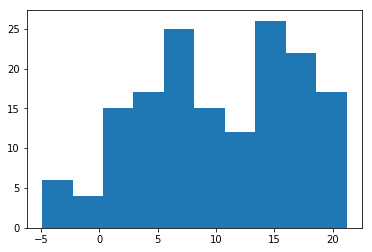

In [35]:
# Load the data

data = np.loadtxt('data/data_train.csv', delimiter=',', dtype=np.dtype("float64"))

# Prepare the data

X = data[:,0:-1]
y = data[:,-1]

# Inspect the data

plt.figure()
plt.hist(X[:,1], 10)


> **Task 1:** Build the histogram for all other variables, then also plot $X_1$ (week number) versus the target (number of cells).

(The next cell shows the plot of $x_3$ versus $x_2$)

Text(0, 0.5, '$x_3$')

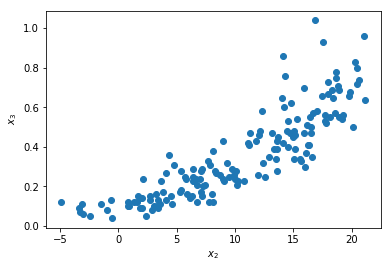

In [36]:
plt.figure()
plt.plot(X[:,1],X[:,2], 'o')
plt.xlabel('$x_2$')
plt.ylabel('$x_3$')


The correlation between $X_1$ (week number) and the target variable (number of cells) should show how the growth season starts at about the 12th week of the year, peaks in the summer months, before ceasing in the final months of the year.

## Preprocessing

Preprocessing is a fundamental step in the machine learning pipeline. In practice, it takes up most of the time. It can involve cleaning the data, dealing with missing values, removing outliers, dimensionality reduction, feature selection and feature engineering. Usually preprocessing is guided by the data exploration process (inspecting the data). For example, there appears to be at outlier in the target column, possibly caused by an $8$ being recorded instead of a $0$. We will come back to this later at evaluation time.

In the data exploration phase it was also noticeable that the attributes were of different scales. A common technique is to standardize each attribute to mean $0$ and standard deviation $1$ so that each variable will be considered equally.

> **Task 2:** Standardize the data of each of the input attributes. Hint: NumPy has a ```mean``` function. Calling ```mean(X,axis=0)``` will return a vector of means, one for each column. The function ```std``` can be used in a similar way for the standard deviation.


In [37]:
np.mean(X, axis=0) #you should obtain array([26.   , 10.23 ,  0.358])

#insert here your solution for Task 2

array([26.   , 10.23 ,  0.358])

## Building a model

A standard approach for regression tasks (such as this one, where the target label is continuous) is *ordinary least squares* (OLS). However, OLS is a linear model, yet we observed previously that the relationship of the $X_1$ feature is non-linear with respect to $Y$. To turn a linear model into a non-linear one, we can use polynomial *basis functions* to create a new feature space, such that by fitting a linear model to this new feature space we obtain a non-linear model. This has been included in the preprocessing\footnote{It is a matter of perspective whether this step is considered part of building the model, or data preprocessing} via the function ```phi```, where the second parameter indicates the degree to the polynomial. Using degree $2$ would produce a new feature space

$$
	\mathbf{z} = \phi(\mathbf{x}) = [1,x_1,x_2,x_3,x^2_1,x^2_2,x^2_3]
$$

for an instance $\mathbf{x}$. For degree $1$, this is equivalent to the original feature space,

$$
	\mathbf{z} = \phi(\mathbf{x}) = [1,x_1,x_2,x_3]
$$

except that we have added a column of $1$s to the new input feature space. This is common practice so that the intercept/bias does not need to be calculated separately.

Our model is represented by the best set of coefficients

$$
	\mathbf{\hat\beta} = [\beta_0,\beta_1,\ldots,\beta_m]^\top
$$

where $m$ is the length of vector $\mathbf{z}$. And where $\mathbf{\hat\beta}$ refers to the values which minimize the mean squared error (or equivalently, sum of squares error) over the data; which is our given/assumed loss metric; given in Eq. (2) (where it is later used for evaluation). Having $\mathbf{\hat\beta}$, we can now make a prediction for any test point;

$$
	\hat{y} = \mathbf{z\hat\beta}
$$

> **Ques 1**: Derive $\mathbf{\hat\beta}$, by minimizing Eq. (2); setting it to $0$ and solving for $\mathbf{\hat\beta}$.

You should have obtained

\begin{equation}
	\mathbf{\hat\beta} = (\mathbf{Z}^\top\mathbf{Z})^{-1}\mathbf{Z}^\top\mathbf{y} \hspace{1.5cm} (1)
\end{equation}
(or equivalent).

> **Task 3**: Implement OLS in Python, to obtain a vector of coefficients. Hint: Since Python 3.6 you can use the ```@``` symbol for matrix multiplication. Note the ```inv``` function, as imported in the code provided. Print out the coefficients using the ```print``` function.


In [41]:
# Feature creation

def phi(X, degree):
    N,D = X.shape
    for d in range(2,degree+1):
        X = np.column_stack([X,X[:,0:D]**d])
    X = np.column_stack([np.ones(len(X)), X])
    return X

# Polynomial degree
degree = 2

Z = phi(X,degree)

#insert here your solution for Task 3

> **Ques 2**: What could go wrong in building this model? Specifically, wrt Eq. (1) ?

## Evaluation and Comparison

Before deploying a model, we should evaluate it to know how useful it is. For this purpose we have held aside some *test data*. It is important to conduct an identical preprocessing on the test data as the train data; noting that the training procedure is done in complete ignorance of the test data.

> **Task 4**: Load and preprocess the test data (```data_test.csv```). Use different variable names (for example, ```X_test``` and ```y_test```)


In [42]:
#insert here your solution for Task 4

We now evaluate the quality of predictions. For this task we use the *mean squared error* as the loss metric, over $N$ examples as
\begin{equation}
	\textsf{MSE}(\mathbf{\hat\beta}) = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2  \hspace{1.5cm} (2)
\end{equation}

> **Task 5**: Implement MSE, i.e., a function such that ```mse = MSE(y_test,y_pred)```. Print out the value obtained. Hints: in ```Numpy``` the number of examples in a vector can be obtained by the ```len``` function; and you can make use of ```mean``` again.

> **Task 6**: Additionally, calculate the MSE where all predictions for test examples are simply the mean of $Y$ in the training data (i.e., a *baseline*).

In [ ]:
#insert here your solutions for Tasks 5 and 6

So far, you should obtain something like the following ($w$ values have been rounded - $w$ for $\mathbf{\hat\beta}$ here).

        w =  [ 1.902  0.117  0.691  0.031 -0.676  0.24   0.031]
        MSE on test data   0.546191331548
        MSE baseline       1.7691746529
          
> **Task 7**: What is the change to MSE if we replace the outlier with a different value (e.g., $0$)?

In [ ]:
#insert here your solution for Task 7

> **Ques 3**: Outliers can have a powerful influence on model accuracy. Explain this influence with regrard to Eq (2)

Why is it important to use a test set for evaluation and not just simply measure the MSE on the training data that we had originally? The answer is to avoid *overfitting*. Overfitting can be demonstrated by comparing results on the training and test sets for different parameter configurations. Here we can see what happens when we vary the degree of the polynomial expansion:

![Overfitting](fig/fig2.png)

> **Ques 4**: What degree of polynomial should you use in your final deployed model, according to this plot?

> **Task 8** (Bonus): Reproduce the results of the figure above. Hints: put the test procedure in a loop, incrementing the degree of polynomial in the expansion each time, then use plotting functions as demonstrated in the earlier tasks; at each iteration of the loop you will need to obtain predictions on both the training and test data using your ```MSE``` function.}

> **Task 9** (Bonus): Apply the regression task using only the two principal components (i.e., apply PCA before the regression). You may implement PCA yourself or use ```sklearn.decomposition.PCA``` from the Scikit-Learn framework.

In [ ]:
#insert here your solution for task 8

In [ ]:
from sklearn.decomposition import PCA

#insert here your solution for task 9